In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dateparser
import datetime as dt

In [2]:
file_paths = ['OrdinaryLife/OL2011_2012.xlsx',
              'OrdinaryLife/OL2013_2014.xlsx',
              'OrdinaryLife/OL2015_2016.xlsx',
              'OrdinaryLife/OL2017.xlsx'
             ]

for file_name in file_paths:
    #Check in the path to pick the file name
    
    #Import the name of the file
    name = pd.read_excel(file_name, engine='openpyxl').iloc[:, :19]
#     name= name.strip()
#     name = name.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    #Name the file columns in each of the datasets
    name.columns = ['Name_of_Scheme', 'Policy_Number', 
                    'id_card', 'Rider', 'Gender', 'Policy_Type', 'status', 
                    'age_difference', 'sum_assured', 'bonus', 
                    'annual_office_premium', 'extra_annual_premium', 
                    'frequency', 'Date_of_Birth', 'Issue_Date', 'Effective_Date', 
                    'maturity_date', 'exit_date', 'cause_of_exit']
    # Exclude headings for different datasets
    name= name[name['extra_annual_premium'] != 'EXTRA']
    name= name[name['extra_annual_premium'] != 'ANNUAL']
    name= name[name['extra_annual_premium'] != 'PREMIUM']
    name= name[name['annual_office_premium'] != 'ANNUAL']
    name= name[name['annual_office_premium'] != 'OFFICE']
    name= name[name['annual_office_premium'] != 'PREMIUM']
    name= name[name['frequency'] != 'Frequency']
    name= name[name['status'] != 'STATUS']
    name= name[name['Policy_Number'] != 'POLICY NO.']
    
    # Convert the given columns into datetime
    name[['Date_of_Birth', 
          'Issue_Date', 
          'Effective_Date', 
          'maturity_date', 
          'exit_date'
         ]] = name[['Date_of_Birth', 
                      'Issue_Date', 
                      'Effective_Date', 
                      'maturity_date', 
                      'exit_date']].apply(pd.to_datetime,
                                          format='%Y/%m/%d',
                                          errors='coerce')

    
    # Convert the Level of Cover to Numeric
    name[['sum_assured', 
          'bonus', 
          'annual_office_premium',
         'extra_annual_premium']] = name[['sum_assured', 
                                           'bonus',
                                           'annual_office_premium',
                                         'extra_annual_premium']].apply(pd.to_numeric, 
                                                                           downcast = 'signed', 
                                                                           errors='coerce')
    
    # Create the Year Column 
    name['year']= name['Effective_Date'].dt.strftime('%Y').astype('int64', errors= "ignore")

      # Create new Age Column
    name['age']=name['Issue_Date'].dt.year-name['Date_of_Birth'].dt.year
    
    # Create Age Group Column
    bins = [0, 21, 31, 41, 51, 61, 110]
    labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61-109']
    name ['agegroup'] = pd.cut(name['age'], bins = bins, labels=labels, right = False )  
    
    
    # Delete Empty Rows
    name = name.dropna(thresh=8)
    
    # Fill empty values on the year column
    name = name.fillna(method= 'ffill').fillna(method= 'bfill')
    
    globals()[file_name.split('/')[-1].split('.')[0]] = name
    
    print(name.shape)
    #print(name.sample(10))
    
    

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell O230099 is marked as a date but the serial value 20080901 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell O230100 is marked as a date but the serial value 20081001 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell O230101 is marked as a date but the serial value 20081001 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell O230102 is marked as a date but the serial value 20080901 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell O241954 is marked as a date but the serial value 20080301 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell O241955 is marked as a date but the serial value 20080301 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell O241956 is marked as a date but the serial value 20080201 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:206: UserWarning: Cell O241957 is marked as a date but the serial value 20080301 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\

(236265, 22)
(623465, 22)
(447296, 22)
(369234, 22)


In [3]:
# Concatenate the datasets into one dataframe
individual_life = pd.concat([OL2011_2012,
                OL2013_2014, 
                OL2015_2016,
                OL2017], 
               ignore_index=True)

print(individual_life.shape)


# Replace Characters


individual_life.head(100)

(1676260, 22)


,Name_of_Scheme,Policy_Number,id_card,Rider,Gender,Policy_Type,status,age_difference,sum_assured,bonus,...,frequency,Date_of_Birth,Issue_Date,Effective_Date,maturity_date,exit_date,cause_of_exit,year,age,agegroup
0,2,NaN,XX,ACCIDENTAL DEATH,M,6,Active,39925,100000.0,27800.000,...,MONTHLY,1974-01-01,2003-11-01,1974-01-01,2013-11-01,2011-11-09,,1974,29.0,21-30
1,2,NaN,XX,ACCIDENTAL DEATH,M,5,Active,39925,142062.0,56540.676,...,ANNUAL,1976-07-08,1997-07-12,1976-07-08,2017-07-12,2011-11-09,,1976,21.0,21-30
2,2,NaN,XX,ACCIDENTAL DEATH,F,5,Active,39925,40000.0,18320.000,...,MONTHLY,1962-01-01,1995-07-22,1962-01-01,2013-07-22,2011-11-09,,1962,33.0,31-40
3,2,NaN,XX,ACCIDENTAL DEATH,M,5,Active,39925,50000.0,22900.000,...,MONTHLY,1967-01-01,1995-08-22,1967-01-01,2013-08-22,2011-11-09,,1967,28.0,21-30
4,2,NaN,XX,ACCIDENTAL DEATH,M,5,Active,39925,50000.0,21400.000,...,MONTHLY,1965-01-01,1996-05-22,1965-01-01,2016-05-22,2011-11-09,,1965,31.0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,NaN,XX,ACCIDENTAL DEATH,F,5,Active,39925,100000.0,30800.000,...,MONTHLY,1974-01-01,2001-06-04,1974-01-01,2014-06-04,2011-11-09,,1974,27.0,21-30
96,2,NaN,XX,ACCIDENTAL DEATH,M,5,Active,39925,70000.0,21560.000,...,MONTHLY,1970-01-01,2001-06-18,1970-01-01,2013-06-18,2011-11-09,,1970,31.0,31-40
97,2,NaN,XX,ACCIDENTAL DEATH,F,6,Active,39925,300000.0,92400.000,...,MONTHLY,1975-01-01,2001-06-11,1975-01-01,2021-06-11,2011-11-09,,1975,26.0,21-30
98,2,NaN,XX,ACCIDENTAL DEATH,M,6,Active,39925,59289.0,18261.012,...,MONTHLY,1965-01-01,2001-07-28,1965-01-01,2016-07-28,2011-11-09,,1965,36.0,31-40


# Types of Products and the number of policyholders under each (Pie Chart)

Policy Type 
 Policy_Type
Education                                    305790
Endowment                                    131861
Term Assurance                               115588
Ordinary Life                                 87150
Unit Linked                                   86613
Money Back                                    72897
Income Builder                                69603
CAREER LIFE PLAN                              43475
Waiver Of Premium-TPD                         37202
Waiver Of Premium For Death - Career Life     36438
Name: Policy_Type, dtype: int64


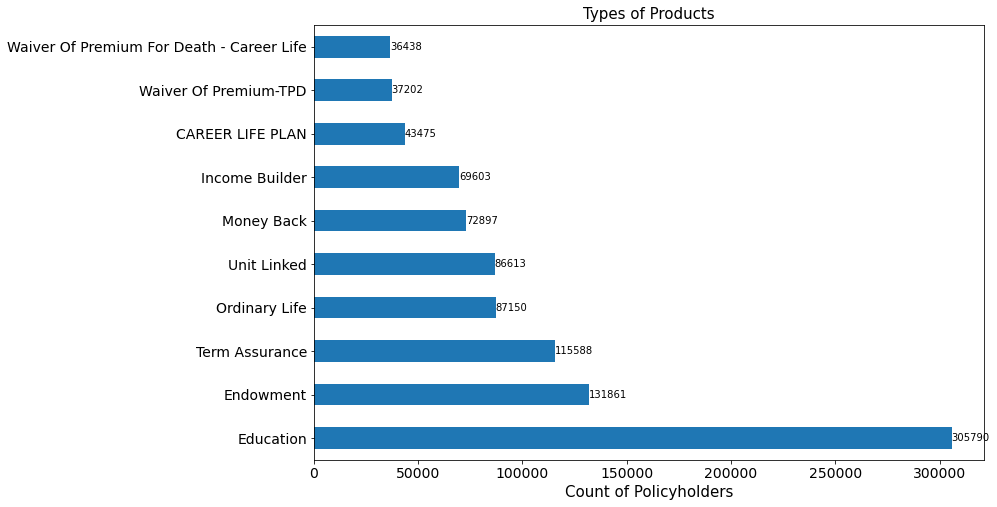

In [4]:
# Replace some codes with their respective meanings
individual_life['Rider']= individual_life['Rider'].replace(['R01', 'R02', 'R03', 'R04', 'R05', 'R06', '1-ADB', '1-WOP'], 
                                                           ['waiver of Premium on Diasability', 'waiver of Premium Critical illeness', 'Accidental death',
                                                           'Personal Accident', 'Critical illness', 'Funeral expense', 'Accidental death', 'waiver of Premium',
                                                           ])


individual_life['Policy_Type']= individual_life['Policy_Type'].replace(['ORD', 'Education - Super E Plus With Lien', 'UL', 'unit linked', 'Term', 'TERM ASSURANCE', 3, 
                                                                       'Education - Super E Plus', 'Education - New Msingi Poa With Lien', 'CAREER LIFE PLUS PLAN LAYER2', 
                                                                        'ENDOWMENT', 'endowment'], 
                                                                       ['Ordinary Life', 'Education', 'Unit Linked', 'Unit Linked', 'Term Assurance', 'Term Assurance', 'Not Defined',
                                                                       'Education', 'Education', 'CAREER LIFE PLAN',
                                                                       'Endowment', 'Endowment'])
individual_life_1 = individual_life[individual_life.Policy_Type != 'Not Defined']

#Plot figures
product= individual_life_1.groupby(['Policy_Type'])['Policy_Type'].count().sort_values(ascending = False)
print("Policy Type \n",product.head(10))

plt.figure(figsize=(12,8))
ax = product[:10].plot(kind='barh', fontsize = 14)
# for index, value in enumerate():
#     plt.text(value, index, str(value))
ax.set_title('Types of Products', fontsize = 15)
ax.set_xlabel('Count of Policyholders', fontsize = 15)
ax.set_ylabel('')

for i, v in enumerate(product[:10]):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

plt.show()

# Annual Number of Individual Life Policies

Annual Coverage 
 year
1941         3
1942         7
1943         8
1944         2
1945         9
         ...  
2015     71193
2016    323091
2017     85254
2018      1187
2019         2
Name: year, Length: 79, dtype: int64


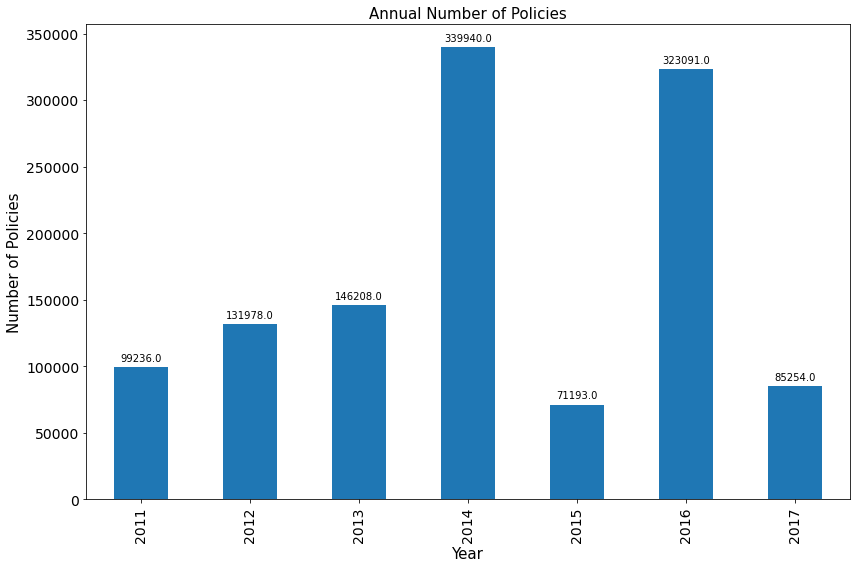

In [5]:
#Plot figures
ol_numbers= individual_life.groupby(['year'])['year'].count()
print("Annual Coverage \n",ol_numbers)

plt.figure(figsize=(12,8))
ax = ol_numbers.loc['2011':'2017'].plot(kind='bar', fontsize = 14)
# for index, value in enumerate():
#     plt.text(value, index, str(value))
ax.set_title('Annual Number of Policies', fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Policies', fontsize = 15)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()

plt.show()

# Premium Comparison for each year

Annual Premiums 
 year
1941    2.682160e+04
1942    5.358720e+04
1943    5.329530e+04
1944    1.404000e+02
1945    5.452430e+04
            ...     
2015    5.551216e+09
2016    2.240278e+10
2017    5.538777e+09
2018    1.191814e+07
2019    5.280000e+04
Name: annual_office_premium, Length: 79, dtype: float64


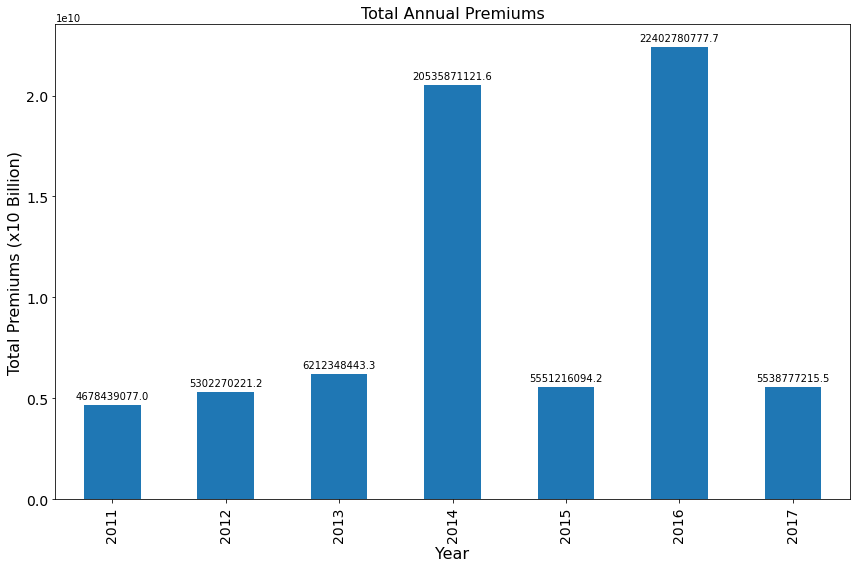

In [6]:
#Plot figures
ol_prem= individual_life.groupby(['year'])['annual_office_premium'].sum()
print("Annual Premiums \n",ol_prem)

plt.figure(figsize=(12,8))
ax = ol_prem.loc['2011':'2017'].plot(kind='bar', fontsize = 14)

ax.set_title('Total Annual Premiums', fontsize = 16)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Total Premiums (x10 Billion)', fontsize = 16)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()

plt.show()

# Premiums Comparison for the products taken

Annual Premiums 
 Policy_Type
Unit Linked                2.097998e+10
Education                  1.880437e+10
Not Defined                9.219744e+09
Endowment                  6.234436e+09
Money Back                 5.545269e+09
Ordinary Life              3.344859e+09
Term Assurance             2.378049e+09
CAREER LIFE PLAN           2.113521e+09
Fanaka Plan Term Layer1    1.447664e+09
Income Builder             1.255893e+09
Name: annual_office_premium, dtype: float64


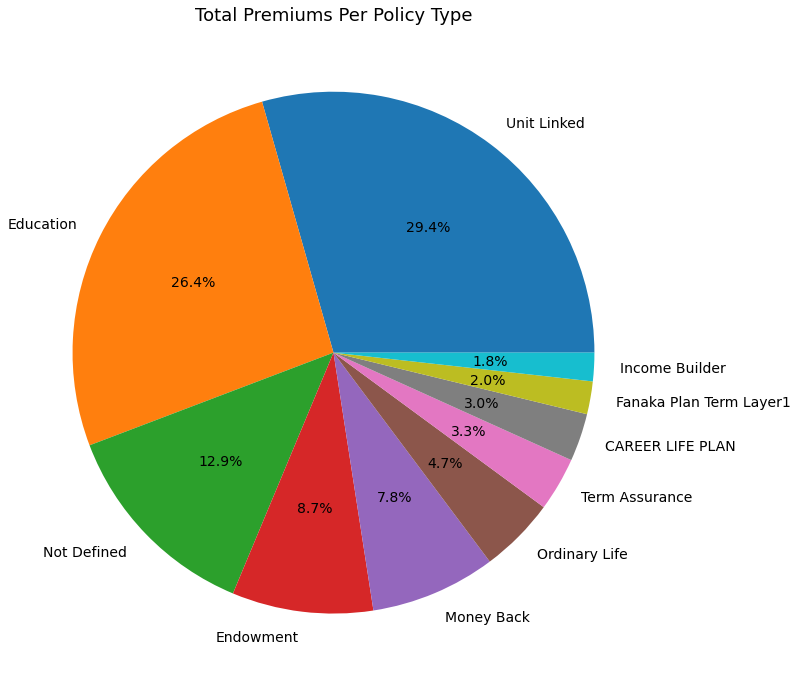

In [7]:
# Exclude rows with some values columns

#Plot figures
ol_prem= individual_life.groupby(['Policy_Type'])['annual_office_premium'].sum().sort_values (ascending = False)
print("Annual Premiums \n",ol_prem[:10])

plt.figure(figsize=(12,12))
ax = ol_prem[:10].plot(kind='pie', autopct='%1.1f%%', fontsize = 14)

ax.set_title('Total Premiums Per Policy Type', fontsize = 18)
# ax.set_xlabel('Policy Type', fontsize = 14)
# ax.set_ylabel('Total Amount of Premiums (X10 Billion)', fontsize = 14)
ax.set_ylabel('')

plt.show()

# Sum Assured Comparison for the products taken

Sum Assured per Policy Type 
 Policy_Type
Education                             1.241380e+11
Money Back                            5.104070e+10
Ordinary Life                         4.368842e+10
Term Assurance                        3.507709e+10
Income Builder                        3.487614e+10
                                          ...     
Unit Linked - NEW SuperSaver          0.000000e+00
Unit Linked - InvestPlus With Lien    0.000000e+00
Unit Linked - InvestPlus              0.000000e+00
Unit Linked - Imarika Chama           0.000000e+00
Unit Linked - NEW InvestPlus          0.000000e+00
Name: sum_assured, Length: 397, dtype: float64


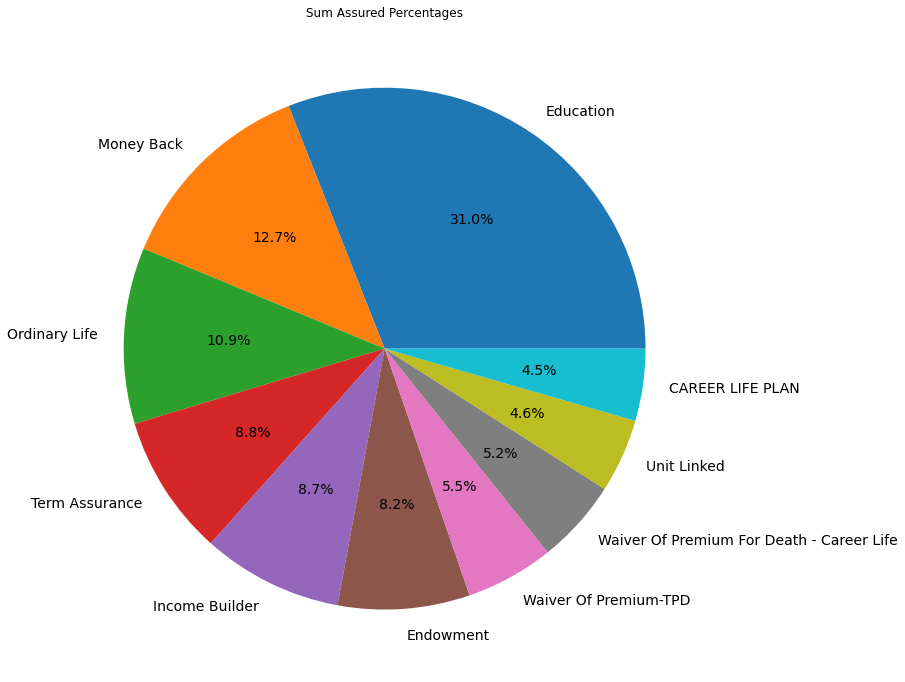

In [8]:
individual_life_1 = individual_life[(individual_life.Policy_Type != 'Not Defined') & (individual_life.Policy_Type != 'EE')]

#Plot figures
ol_prem= individual_life_1.groupby(['Policy_Type'])['sum_assured'].sum().sort_values (ascending = False)
print("Sum Assured per Policy Type \n",ol_prem)

plt.figure(figsize=(12,12))
ax = ol_prem[:10].plot(kind='pie', autopct='%1.1f%%', fontsize = 14)

ax.set_title('Sum Assured Percentages')
# ax.set_xlabel('Policy Type')
# ax.set_ylabel('Sum Assured')
ax.set_ylabel('')


plt.show()

#  Age bands at policy inception of policyholder

Policyholders' age groups 
 agegroup
1-20       65429
21-30     272024
31-40     724651
41-50     509529
51-60      99939
61-109      4688
Name: agegroup, dtype: int64


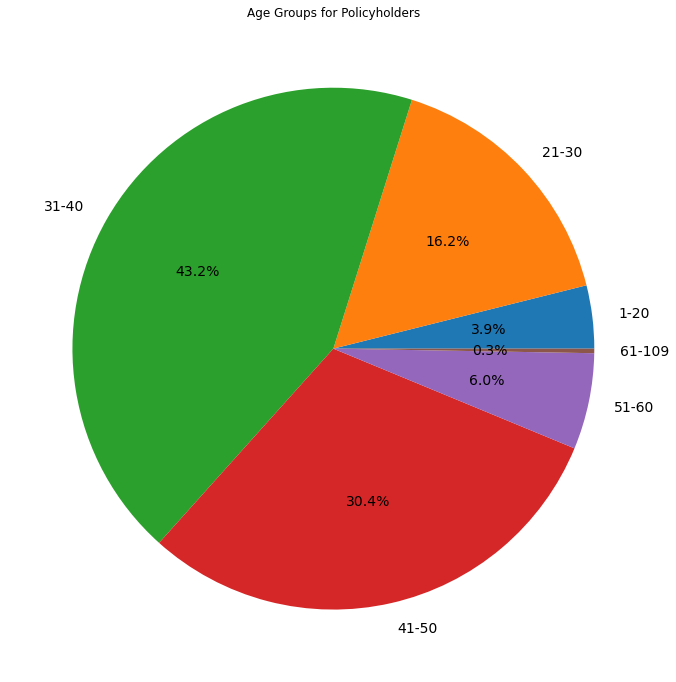

In [9]:
# Age bands, if data available
#Plot figures
age= individual_life.groupby(['agegroup'])['agegroup'].count()
print("Policyholders' age groups \n",age)

plt.figure(figsize=(12,12))
ax = age.plot(kind='pie', autopct='%1.1f%%', fontsize = 14)

ax.set_title('Age Groups for Policyholders')
# ax.set_xlabel('Age Groups')
ax.set_ylabel('')


plt.show()

In [10]:
individual_life.to_csv(r'combined_csv/individual_life.csv')

#  Distribution of claims (causes – maturities, withdrawals, deaths etc). (Pie chart)

# Import the Claims Data and Clean it

In [11]:
file_paths = ['OrdinaryLife/OL2011_2012_CLAIMS.xlsx',
              'OrdinaryLife/OL2013_2014CLAIMS.xlsx',
              'OrdinaryLife/OL2015_2016CLAIMS.xlsx',
              'OrdinaryLife/OL2017_CLAIMS.xlsx'
             ]

for file_name in file_paths:
    #Check in the path to pick the file name
    
    #Import the name of the file
    name = pd.read_excel(file_name, engine='openpyxl').iloc[:, :17]
#     name= name.strip()
#     name = name.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    #Name the file columns in each of the datasets
    name.columns = ['Policy_Number', 'id_card', 'Rider', 'Gender', 'Policy_Type',
                    'age_differerence', 'claim_amount_basic_policy', 'total_claim_amount', 'claim_payable',
                    'Date_of_Birth', 'Issue_Date', 'Effective_Date', 'maturity_date', 'date_of_death', 
                    'date_reported', 'date_claim_paid', 'cause_of_death']
    # Exclude headings for different datasets
    name= name[name['Policy_Number'] != 'POLICY NUMBER']
    name= name[name['age_differerence'] != 'DIFFERENCE']
    name= name[name['Issue_Date'] != 'DATE']
    name= name[name['Policy_Number'] != 'Policy No.']
    name= name[name['Gender'] != 'Policy No.']
    
    # Convert the given columns into datetime
    name[['Date_of_Birth', 
          'Issue_Date', 
          'Effective_Date', 
          'maturity_date', 
          'date_of_death',
          'date_reported',
          'date_claim_paid']] = name[['Date_of_Birth', 
                                      'Issue_Date', 
                                      'Effective_Date', 
                                      'maturity_date', 
                                      'date_of_death',
                                       'date_reported',
                                       'date_claim_paid']].apply(pd.to_datetime,
                                                          format='%Y/%m/%d',
                                                          errors='coerce')

    
    # Convert the Level of Cover to Numeric
    name[['claim_amount_basic_policy', 
          'total_claim_amount', 
          'claim_payable']] = name[['claim_amount_basic_policy', 
                                           'total_claim_amount',
                                           'claim_payable']].apply(pd.to_numeric, 
                                                                           downcast = 'signed', 
                                                                           errors='coerce')
    
    

    # Create the Year Column 
    name['year']= name['Effective_Date'].dt.strftime('%Y').astype('int64', errors= "ignore")
    
    # Create new Age Column
    name['age']=name['Issue_Date'].dt.year-name['Date_of_Birth'].dt.year
    
    # Create Age Group Column
    bins = [0, 21, 31, 41, 51, 61, 110]
    labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61-109']
    name ['agegroup'] = pd.cut(name['age'], bins = bins, labels=labels, right = False )  
    
    
    # Delete Empty Rows
    name = name.dropna(thresh=8)
    
    # Fill empty values on the year column
    name = name.fillna(method= 'ffill').fillna(method= 'bfill')
    
    globals()[file_name.split('/')[-1].split('.')[0]] = name
    
    print(name.shape)
    #print(name.sample(10))
    
    

(722, 20)
(2441, 20)
(763, 20)
(365, 20)


In [12]:
# Concatenate the datasets into one dataframe
individual_claims = pd.concat([OL2011_2012_CLAIMS,
                OL2013_2014CLAIMS, 
                OL2015_2016CLAIMS,
                OL2017_CLAIMS], 
               ignore_index=True)

print(individual_claims.shape)


# Replace Characters


individual_claims.head(100)

(4291, 20)


,Policy_Number,id_card,Rider,Gender,Policy_Type,age_differerence,claim_amount_basic_policy,total_claim_amount,claim_payable,Date_of_Birth,Issue_Date,Effective_Date,maturity_date,date_of_death,date_reported,date_claim_paid,cause_of_death,year,age,agegroup
0,MLP13643,NaN,Death Cover,M,ENDOWMENT,0,100000.00,100000.00,100000.00,1975-01-01,2006-01-06,2006-01-06,2016-05-31,2011-10-01,2011-10-05,2011-10-14 00:00:00,CPA due to Hypoglycaemia,2006,31.0,31-40
1,MLP13643,NaN,Death Cover,M,ENDOWMENT,0,100000.00,100000.00,100000.00,1954-01-01,2005-01-22,2005-01-22,2015-01-22,2011-04-01,2011-04-07,2011-04-17 00:00:00,CPA due to Hypoglycaemia,2005,51.0,51-60
2,MLP13643,NaN,Death Cover,M,ENDOWMENT,0,121400.00,121400.00,121400.00,1975-03-15,2006-07-01,2006-07-01,2018-07-01,2012-03-18,2012-03-27,2012-04-04 00:00:00,CPA due to Hypoglycaemia,2006,31.0,31-40
3,MLP13643,NaN,Death Cover,F,ENDOWMENT,0,95000.00,95000.00,95000.00,1966-01-01,2003-08-22,2003-08-22,2013-08-21,2012-01-28,2012-02-01,2012-02-11 00:00:00,CPA due to Hypoglycaemia,2003,37.0,31-40
4,MLP13643,NaN,Death Cover,F,ENDOWMENT,0,100000.00,100000.00,100000.00,1966-01-01,2005-05-22,2005-05-22,2015-05-22,2012-02-03,2012-02-11,2012-02-16 00:00:00,CPA due to Hypoglycaemia,2005,39.0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MLP13643,NaN,Death Cover,F,ENDOWMENT,0,95000.00,95000.00,95000.00,1959-08-20,2001-05-01,2001-05-01,2011-05-01,2011-08-02,2011-11-24,2012-07-03 02:30:00,CPA due to Hypoglycaemia,2001,42.0,41-50
96,MLP13643,NaN,Death Cover,F,ENDOWMENT,0,95000.00,95000.00,95000.00,1959-08-20,2001-12-01,2001-12-01,2011-12-01,2011-08-02,2011-11-24,2012-06-28 10:24:00,CPA due to Hypoglycaemia,2001,42.0,41-50
97,MLP13643,NaN,Death Cover,M,ENDOWMENT,0,49215.68,49215.68,49215.68,1965-09-20,2001-01-01,2001-01-01,2016-01-01,2011-08-02,2011-10-05,2011-10-05 06:07:00,CPA due to Hypoglycaemia,2001,36.0,31-40
98,MLP13643,NaN,Death Cover,M,ENDOWMENT,0,100000.00,100000.00,100000.00,1965-09-20,2003-08-01,2003-08-01,2017-08-01,2011-08-02,2011-11-14,2011-10-05 06:13:00,CPA due to Hypoglycaemia,2003,38.0,31-40


# Main Causes of Claims

Policyholders' age groups 
 cause_of_death
accidental death                  1172
CPA due to Hypoglycaemia           337
ILLNESS                            274
R                                  242
NORMAL DEATH                       237
                                  ... 
GLUTEAL ABCESS                       1
GASTROINTESTINAL BLEEDING            1
Explosion                            1
Excessive haemorrhage, gunshot       1
2016-02-05 00:00:00                  1
Name: cause_of_death, Length: 293, dtype: int64


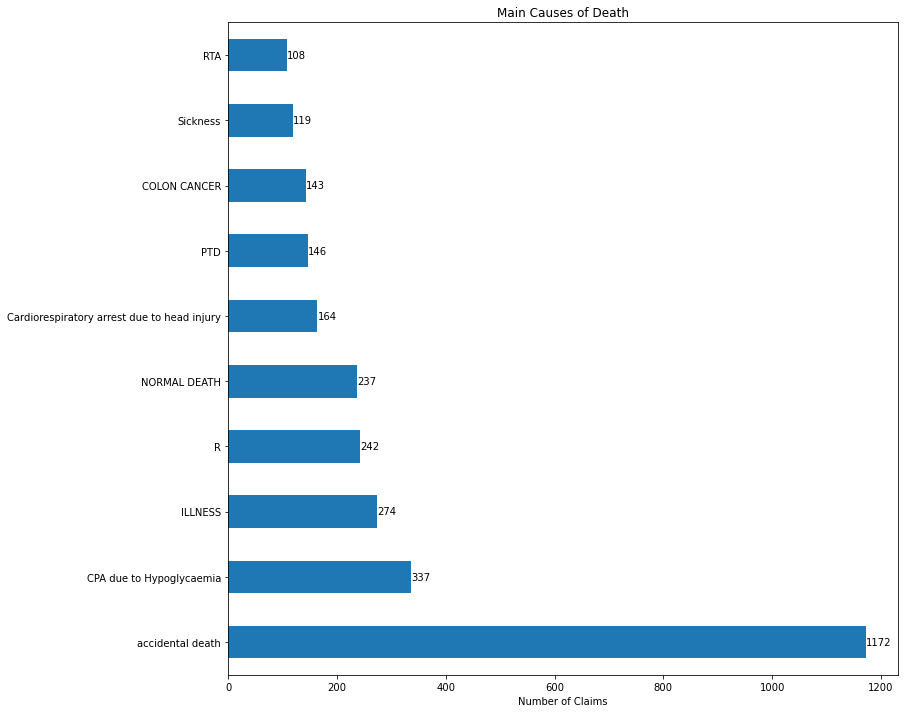

In [13]:
#Plot figures
claims= individual_claims.groupby(['cause_of_death'])['cause_of_death'].count().sort_values(ascending=False)
print("Policyholders' age groups \n",claims)

plt.figure(figsize=(12,12))
ax = claims[:10].plot(kind='barh')

ax.set_title('Main Causes of Death')
ax.set_xlabel('Number of Claims')
# ax.set_ylabel('Sum Assured')
ax.set_ylabel('')

for i, v in enumerate(claims[:10]):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

plt.show()

In [14]:
individual_claims.to_csv(r'combined_csv/individual_life_claims.csv')

In [ ]:
OL2011_2012.head(100)